# "Estrategia comercial de turismo emisivo en Uruguay"

# Abstracto

El siguiente trabajo se enfoca en el análisis de un conjunto de datos relacionado con el turismo emisivo de Uruguay. El dataset contiene información detallada sobre los turistas, sus destinos elegidos, fechas y puntos de salida y llegada, gastos realizados y otros datos relevantes. El objetivo principal es obtener una comprensión profunda de los patrones y tendencias en los viajes de los turistas, lo que podría ofrecer valiosos conocimientos para la toma de decisiones en la industria del turismo y la formulación de estrategias de marketing.

Se llevará a cabo un análisis descriptivo para examinar la distribución de variables clave como el destino, los eventos a través del tiempo y los gastos realizados, entre otros. Se examinará además si existen tendencias estacionales en las fechas de viaje.

**Contexto empresarial.** Uruguay experimenta en los últimos años un gran crecimiento en lo que hace a turismo emisivo. Luego de la pandemia por COVID-19 la actividad turística se recupera y cada vez son más los pasajeros que viajan fuera del país ya sea por trabajo o placer. En base a esto, una importante empresa de turismo local nos hay seleccionado para analizar la situación y proporcionar iniciativas para mejorar su estrategia comercial.


**Problema comercial.** Aplicar una estrategia basada en los datos analizados que permita mejorar las ventas, diseñando y ofreciendo paquetes turísticos que se adapten a las preferencias de los pasajeros.


**Contexto analítico.** Para guiar el análisis, se proponen las siguientes preguntas e hipótesis de interés:


Preguntas generales:

a. ¿Cuál es la situación actual del turismo emisivio en el país?

b. ¿Cómo se en relación a años anteriores?

c. ¿Qué tendencias o patrones se pueden observar?


**Preguntas de Investigación:**

1. ¿Cuáles son los lugares de salida más utilizados?
2. ¿Cuáles son los destinos más populares entre los turistas emisivos?
3. ¿Hay patrones estacionales en las fechas de salida y llegada de los turistas?
4. ¿Qué podemos decir sobre los gastos realizados en el exterior?

Para responder a estas preguntas contamos con un conjunto de datos obtenidos desde el Ministerio de Turismo de Uruguay (https://catalogodatos.gub.uy/dataset/ministerio-de-turismo-turismo-emisivo)

Mediante la aplicación de técnicas de visualización como gráficos de barras, series de tiempo y scatterplots, se espera proporcionar una representación clara y significativa de los datos. El análisis de este trabajo puede ofrecer información valiosa tanto para la industria turística como para investigaciones futuras en el campo del turismo emisivo y su impacto económico.


# Análisis exploratorio de datos

In [1]:
# Comenzamos montando el dataset con pandas, e importamos seaborn y matplotlib para los graficos
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('/content/drive/MyDrive/Coder/Poyecto/ProyectoFinal/emisivo.xlsx')

Mounted at /content/drive


In [ ]:
# Shape para conocer el volumen de datos, contamos con 22mil filas y 41 columnas

print ("")
print ("--Shape--")
print(df.shape)


# Info para conocer los tipos datos con los que contamos, vemos que no tenemos valores nulos
print ("")
print ("--Info--")
print (df.info())


# Contamos la cantidad de cada tipo de dato presente
print ("")
print ("--Conteo de variables--")
print (df.dtypes.value_counts())



--Shape--
(22217, 41)

--Info--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22217 entries, 0 to 22216
Data columns (total 41 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   IdLugarSalida                        22217 non-null  int64         
 1   Lugar Salida                         22217 non-null  object        
 2   IdTranspSalidad                      22217 non-null  int64         
 3   Transporte Internacional de Salida   22217 non-null  object        
 4   FechaSalida                          22217 non-null  datetime64[ns]
 5   IdFecSalida                          22217 non-null  int64         
 6   FechaEntrada                         22217 non-null  datetime64[ns]
 7   IdFecEntrada                         22217 non-null  int64         
 8   IdNacionalidad                       22217 non-null  int64         
 9   Pais                                 22217 non-nul

In [ ]:
# Usamos la función "head()" para conocer la apariencia de nuestro set de datos
df.head(7)

,IdLugarSalida,Lugar Salida,IdTranspSalidad,Transporte Internacional de Salida,FechaSalida,IdFecSalida,FechaEntrada,IdFecEntrada,IdNacionalidad,Pais,...,GastoAlojamiento,GastoAlimentacion,GastoTransporteInternac,GatoTransporteLocal,GastoCultural,GastoTours,GastoCompras,GastoResto,Coef,CoefTot
0,4,Chuy,2,Terrestre Auto,2016-12-29,13512,2017-01-10,13524,1,Uruguay,...,981.39,350.50,0.0,175.24,0.00,0.00,0.00,0.00,89.61,448.05
1,18,Río Branco,2,Terrestre Auto,2016-12-29,13512,2017-01-09,13523,1,Uruguay,...,1100.00,880.00,0.0,385.00,300.00,235.00,210.00,165.00,96.18,480.88
2,3,Aeropuerto de Carrasco,1,Aereo,2017-01-03,13517,2017-01-27,13541,1,Uruguay,...,0.00,1129.75,214.0,836.85,523.03,256.29,2039.83,0.00,129.04,258.09
3,3,Aeropuerto de Carrasco,1,Aereo,2017-01-06,13520,2017-01-21,13535,1,Uruguay,...,2228.41,1782.73,117.0,779.94,445.68,0.00,311.98,334.26,129.04,387.13
4,4,Chuy,2,Terrestre Auto,2017-01-02,13516,2017-01-25,13539,1,Uruguay,...,1800.00,933.12,0.0,408.24,152.14,0.00,106.50,0.00,89.61,448.05
5,18,Río Branco,2,Terrestre Auto,2016-12-30,13513,2017-01-09,13523,1,Uruguay,...,1400.00,1200.00,0.0,311.88,267.33,0.00,187.13,133.66,96.18,480.88
6,7,Fray Bentos,3,Terrestre Bus,2016-12-30,13513,2017-01-03,13517,1,Uruguay,...,0.00,473.17,283.9,120.00,84.12,0.00,262.87,1896.00,128.81,386.44


In [ ]:
# Buscamos la fecha más reciente y la más intigua para conocer desde y hasta cuándo se recopilaron los datos
fecha_mas_reciente = df['FechaSalida'].max()
fecha_mas_antigua = df['FechaSalida'].min()

print("La fecha más reciente en el conjunto de datos es:", fecha_mas_reciente)
print("La fecha más antigua en el conjunto de datos es:", fecha_mas_antigua)


La fecha más reciente en el conjunto de datos es: 2023-07-27 00:00:00
La fecha más antigua en el conjunto de datos es: 2016-12-13 00:00:00


## Análisis de nulos y duplicados

In [ ]:
# Aquí generamos una serie que contiene la suma de valores nulos de cada columna y vemos que no hay nulos
serie_nulos=(df.isnull().sum())
print (serie_nulos)

IdLugarSalida                          0
Lugar Salida                           0
IdTranspSalidad                        0
Transporte Internacional de Salida     0
FechaSalida                            0
IdFecSalida                            0
FechaEntrada                           0
IdFecEntrada                           0
IdNacionalidad                         0
Pais                                   0
IdDeptoResidencia                      0
Departamento                           0
IdMotivo                               0
Motivo                                 0
IdOcupacion                            0
Ocupacion                              0
IdNivelEstudio                         0
Estudio                                0
IdDestino                              0
Destino                                0
IdAlojamiento                          0
Alojamiento                            0
IdLugarIngreso                         0
Lugar Ingreso                          0
IdTranspIngreso 

In [ ]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
22212    False
22213    False
22214    False
22215    False
22216    False
Length: 22217, dtype: bool

### **Pregunta 1:**
Con el siguiente gráfico analizaremos cuál es punto de salida del país más utilizado, en función de las cantidad de observaciones por cada uno.
Podemos observar que el aeropuerto de Carrasco es el más utilizado, seguido por Fray Bentos y Colonia del Sacramento

In [ ]:
# Conteo de la cantidad de veces que aparece cada lugar
conteo_salida = df['Lugar Salida'].value_counts().reset_index()

# Definimos las columnas
conteo_salida.columns = ['Lugar Salida', 'Cantidad de observ']

El top 10 de los lugares de salida observados es el siguiente:

In [ ]:
#Ploteamos
conteo_salida.head(10).style.background_gradient(cmap='Blues', subset = ['Cantidad de observ'])

,Lugar Salida,Cantidad de observ
0,Aeropuerto de Carrasco,5363
1,Fray Bentos,4025
2,Colonia,3605
3,Salto,2662
4,Paysandú,2344
5,Chuy,1050
6,Puerto de montevideo,1008
7,Rivera,707
8,Río Branco,516
9,Bella Unión,258


### **Pregunta 2:**
Graficamos una serie de tiempo por cada destino, para dar visibilidad de cuáles son los más elegidos y cómo se comportan a través del tiempo.
Vemos que el destino más elegido es Argentina, seguido por Brasil.
Se puede observar cierta estacionalidad en el período de invierno, entre los meses junio, julio y agosto, con crecimiento desde octubre en adelante.

Un dato curioso es ver cómo Argentina tiene un crecimiento importante durante 2022, alcanzando un pico máximo histórico (para la muestra) en diciembre 2022

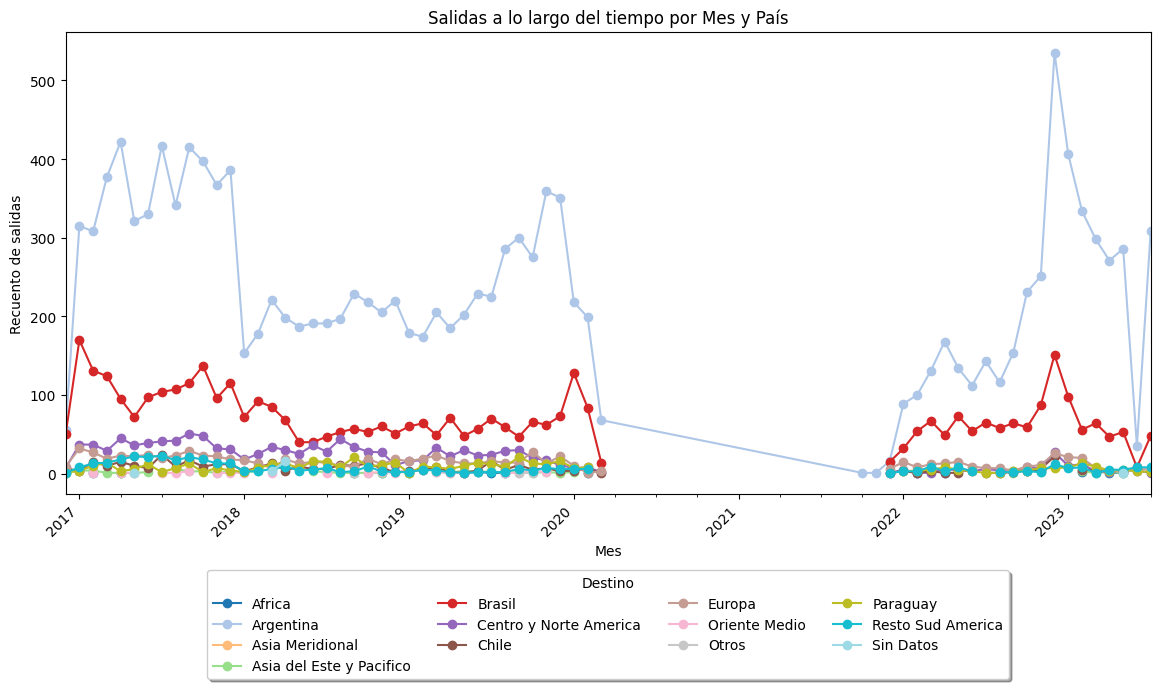

In [ ]:
df['FechaSalida'] = pd.to_datetime(df['FechaSalida'])

# Agrupamos los eventos por mes y país
eventos_por_mes_pais = df.groupby([df['FechaSalida'].dt.to_period('M'), 'Destino']).size().unstack()

fig, ax = plt.subplots(figsize=(14, 6))

eventos_por_mes_pais.plot(kind='line', marker='o', ax=ax, colormap="tab20") # Ploteamos y cambiamos la paleta de colores

plt.xlabel('Mes')
plt.ylabel('Recuento de salidas')
plt.title('Salidas a lo largo del tiempo por Mes y País')

# Movemos la leyenda abajo y fuera del gráfico
plt.legend(title='Destino', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, shadow=True)  # Ajustamos la leyenda
plt.xticks(rotation=45, ha='right')  # Rotar los nombres del eje x y alineamos a la derecha

plt.show()



Como vemos, Argentina y Brasil son los destinos más elegidos. Como ya reconocimos este comportamiento, vamos a excluirlos del gráfico para ver con más claridad los demás destinos. También quitaremos los valores "Otros" y "Sin Datos" ya que no aportan valor.

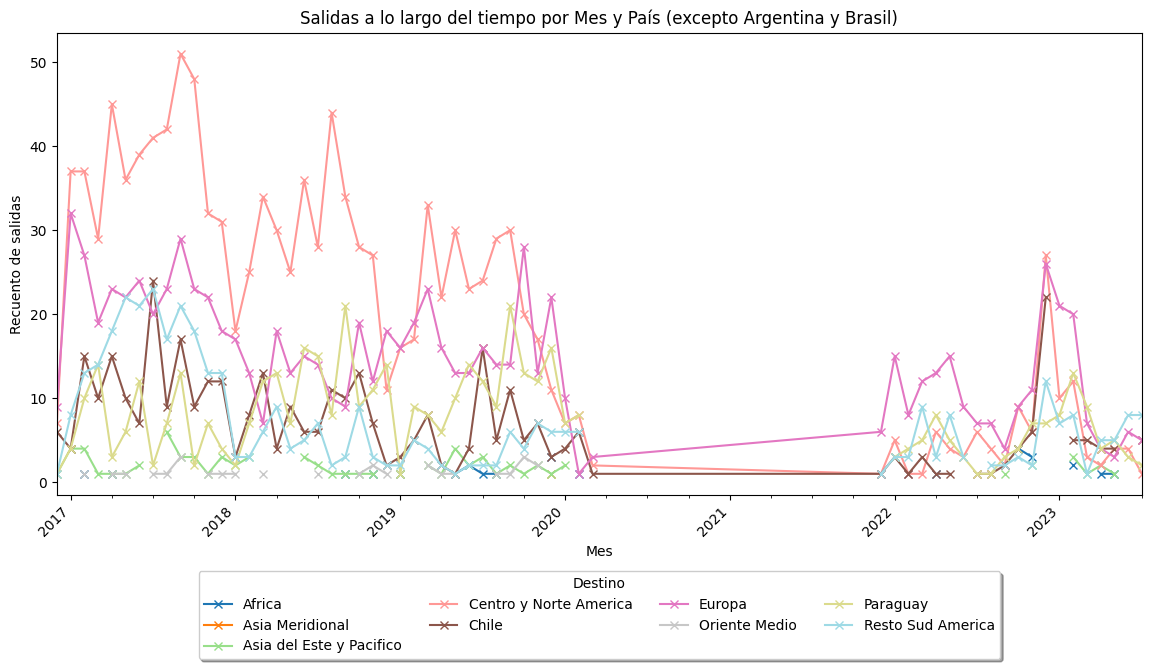

In [ ]:
# Filtramos los datos excluyendo los valores en la columna "Destino"
df_filtrado = df[~df['Destino'].isin(['Argentina', 'Brasil', 'Sin Datos', 'Otros'])]

# Agrupamos por "FechaSalida" y "Destino" excluyendo los valores mencionados
eventos_por_mes_pais = df_filtrado.groupby([df_filtrado['FechaSalida'].dt.to_period('M'), 'Destino']).size().unstack()

fig, ax = plt.subplots(figsize=(14, 6))

eventos_por_mes_pais.plot(kind='line', marker='x', ax=ax, colormap="tab20") # Ploteamos y cambiamos la paleta de colores

plt.xlabel('Mes')
plt.ylabel('Recuento de salidas')
plt.title('Salidas a lo largo del tiempo por Mes y País (excepto Argentina y Brasil)')

# Movemos la leyenda abajo y fuera del gráfico
plt.legend(title='Destino', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, shadow=True)  # Ajustamos la leyenda
plt.xticks(rotation=45, ha='right')  # Rotar los nombres del eje x y alineamos a la derecha

plt.show()

Observamos que luego de Argentina y Brasil, los destinos más presentos son Centro y Norte América, y luego Europa.

Profundizamos un paso más y acotaremos las muestras a partir del año 2022 en adelante. En este caso la tendencia se mantiene.

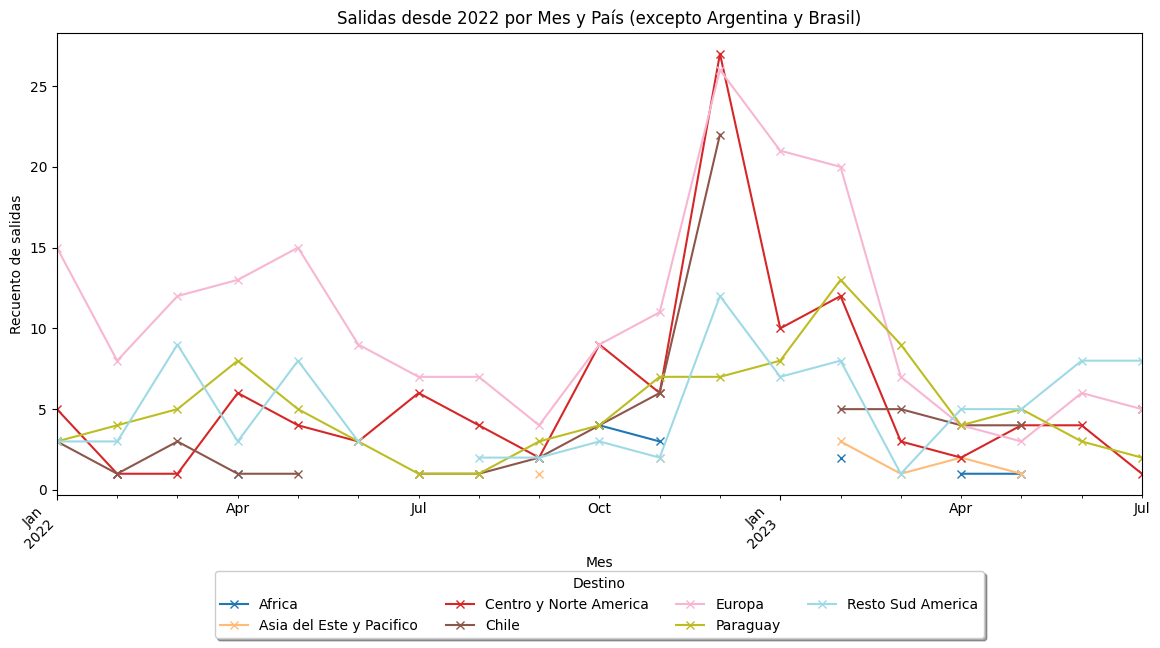

In [ ]:
# Filtramos los datos excluyendo los valores en la columna "Destino"
df_filtrado_destino = df[~df['Destino'].isin(['Argentina', 'Brasil', 'Sin Datos', 'Otros'])]

# Filtramos los registros con "FechaSalida" a partir de 2022
df_filtrado_anio = df_filtrado_destino[df_filtrado_destino['FechaSalida'].dt.year >= 2022]

# Agrupar por "FechaSalida" y "Destino"
df_filtrado_anio  = df_filtrado_anio.groupby([df_filtrado_anio['FechaSalida'].dt.to_period('M'), 'Destino']).size().unstack()

fig, ax = plt.subplots(figsize=(14, 6))

df_filtrado_anio.plot(kind='line', marker='x', ax=ax, colormap="tab20") # Ploteamos y cambiamos la paleta de colores

plt.xlabel('Mes')
plt.ylabel('Recuento de salidas')
plt.title('Salidas desde 2022 por Mes y País (excepto Argentina y Brasil)')

# Movemos la leyenda abajo y fuera del gráfico
plt.legend(title='Destino', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, shadow=True)  # Ajustamos la leyenda
plt.xticks(rotation=45, ha='right')  # Rotar los nombres del eje x y alineamos a la derecha

plt.show()


In [ ]:
# Conteo de la cantidad de veces que aparece cada lugar
conteo_destinos = df['Destino'].value_counts().reset_index()

# Definimos las columnas
conteo_destinos.columns = ['Destino', 'Cantidad de observ']

In [ ]:
#Ploteamos
conteo_destinos.head(10).style.background_gradient(cmap='Blues', subset = ['Cantidad de observ'])

,Destino,Cantidad de observ
0,Argentina,14415
1,Brasil,4285
2,Centro y Norte America,1215
3,Europa,885
4,Paraguay,461
5,Resto Sud America,406
6,Chile,392
7,Asia del Este y Pacifico,76
8,Oriente Medio,29
9,Africa,27


### **Pregunta 3:**
Veamos ahora el comportamiento segun las fechas de salidas y los destinos elegidos. ¿Existe algún patrón estacional?
En la distribución vemos un comportamiento esperado, la falta de datos entre 2020 y 2021, período de tiempo en que no estaba permitido viajar al exterior debido a la pandemia de COVID-19

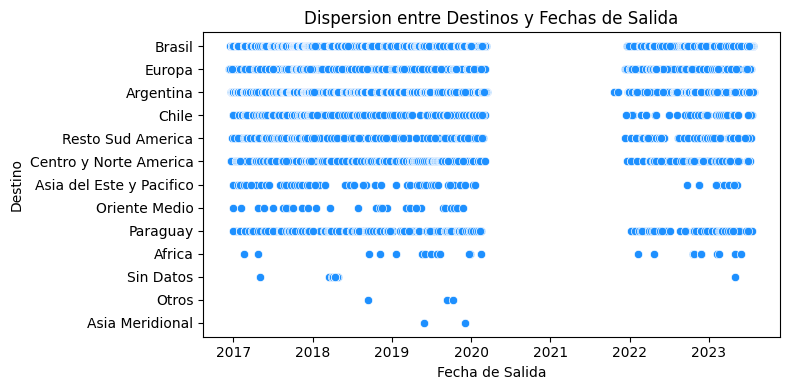

In [ ]:
# Convertir la columna "FechaSalida" a formato de fecha
df['FechaSalida'] = pd.to_datetime(df['FechaSalida'])

plt.figure(figsize=(8, 4))

# Creamos el scatterplot utilizando Seaborn
sns.scatterplot(y=df['Destino'], x=df['FechaSalida'], color='dodgerblue', marker='o')
plt.xlabel('Fecha de Salida')
plt.ylabel('Destino')
plt.title('Dispersion entre Destinos y Fechas de Salida')
plt.tight_layout()
plt.show()

Si miramos el recuento por año, notamos la caída en el período 2020-2021, y también cómo durante 2022 la actividad no ha recuperado los niveles que tenía previo a 2020.
Otro dato importante es notar el crecimiento de la actividad. El conjunto de datos cuenta con información hasta julio 2023 y podemos observar que durante esta primera mitad del año ya se alcanza el 75% del volumen total del año anterior:

*   Año 2022: 3345 salidas
*   Año 2023: 2535 salidas

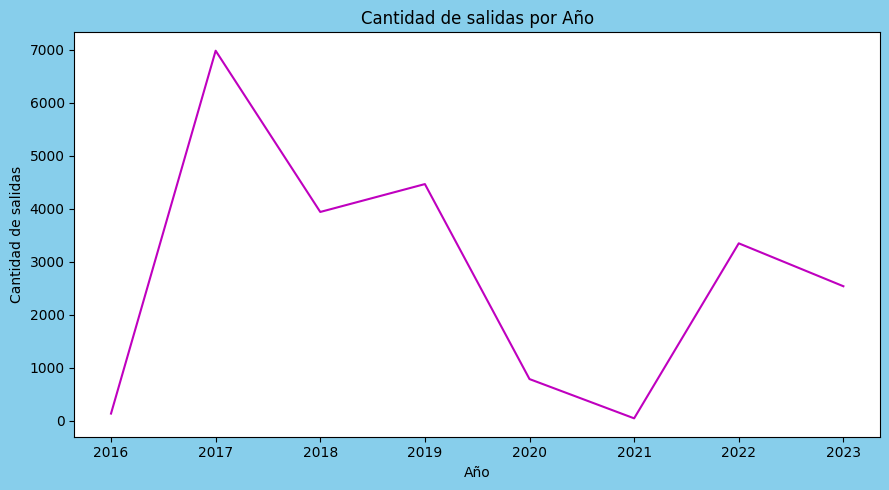


--Source--
2016     132
2017    6980
2018    3937
2019    4463
2020     783
2021      42
2022    3345
2023    2535
Name: Anio, dtype: int64


In [ ]:
# Convertir la columna "FechaSalida" a formato de fecha
df['FechaSalida'] = pd.to_datetime(df['FechaSalida'])

# Extraer el mes numérico de cada fecha
df['Anio'] = df['FechaSalida'].dt.year

# Calcular el recuento de eventos por mes
recuento_por_anio = df['Anio'].value_counts().sort_index()

plt.figure(figsize=(9, 5), facecolor='skyblue')

# Ordenar los meses de forma cronológica
recuento_por_anio = recuento_por_anio.sort_index()

# Crear una serie de tiempo utilizando Seaborn
recuento_por_anio.plot(kind='line', color='m')
plt.xlabel('Año')
plt.ylabel('Cantidad de salidas')
plt.title('Cantidad de salidas por Año')

plt.tight_layout()
plt.show()

# Imprimimos una mini tablita con los valores del grafico
print ("")
print ("--Source--")
print(recuento_por_anio.sort_index())

Y ahora haciendo un recuento de observaciones por cada mes de salida declarado, armamos una serie de tiempo que muestra la cantidad de salidas totales de la muestra, por mes calendario.
Observamos que los meses de mayor turismo emisivo son diciembre (con un salto grande respecto a noviembre) y enero, que luego va cayendo casi linealmente hasta junio-julio-agosto, los meses de menor actividad. Julio presenta un pico que tiene relación con el período vacacional escolar de invierno.
También se debe tener en cuenta que el año 2023 no está completo, por lo que los valores de los meses restantes pueden ser aún mayores.

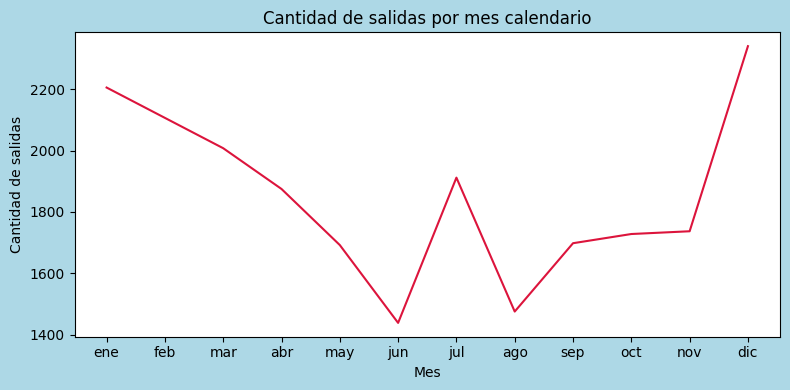


--Source--
1     2206
2     2107
3     2008
4     1875
5     1692
6     1438
7     1912
8     1475
9     1698
10    1728
11    1737
12    2341
Name: Mes, dtype: int64


In [ ]:
# Convertir la columna "FechaSalida" a formato de fecha
df['FechaSalida'] = pd.to_datetime(df['FechaSalida'])

# Extraer el mes de cada fecha
df['Mes'] = df['FechaSalida'].dt.month

# Calcular el recuento de eventos por mes
recuento_por_mes = df['Mes'].value_counts().sort_index()

plt.figure(figsize=(8, 4), facecolor='lightblue')

# Ordenar los meses de forma cronológica
recuento_por_mes = recuento_por_mes.sort_index()

# Crear una serie de tiempo utilizando Seaborn
recuento_por_mes.plot(kind='line', color='crimson')
plt.xlabel('Mes')
plt.ylabel('Cantidad de salidas')
plt.title('Cantidad de salidas por mes calendario')
plt.xticks(range(1, 13), ["ene", "feb", "mar", "abr", "may", "jun", "jul", "ago", "sep", "oct", "nov", "dic"])
plt.tight_layout()
plt.show()

print ("")
print ("--Source--")
print(recuento_por_mes.sort_index())


### **Pregunta 4:**
Ya que contamos con un campo que muestra el *Gasto Total* de cada observación, vamos a analizar cuánto gastan los turistas en promedio cuando salen del país, y cómo están distribuidos los valores.
Así comprobamos que la media del gasto total se ubica en 750 pesos, con el primer cuartil en 352 y el tercero en 1500 pesos. También vemos un máximo de 76mil que podemos tomar como outlier.

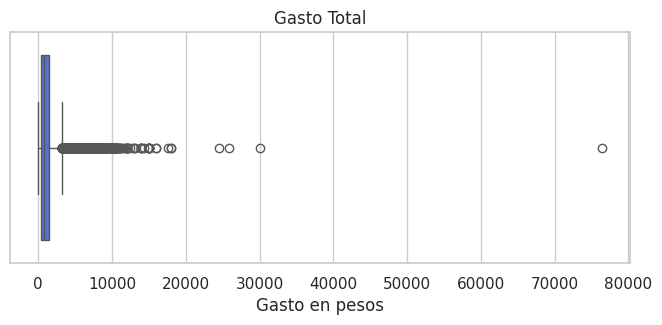

count    22217.000000
mean      1203.725859
std       1531.977294
min          0.000000
25%        355.000000
50%        750.000000
75%       1500.000000
max      76389.180000
Name: GastoTotal, dtype: float64

In [ ]:
# En el siguiente paso analizaremos la variable -gasto total-

sns.set(style="whitegrid")  # Estilo del gráfico
plt.figure(figsize=(8, 3))  # Tamaño de la figura
sns.boxplot(data=df, x='GastoTotal', color='royalblue')
plt.xlabel('Gasto en pesos')
plt.title('Gasto Total')
plt.show()

df['GastoTotal'].describe() # Agregamos la funcion describe()

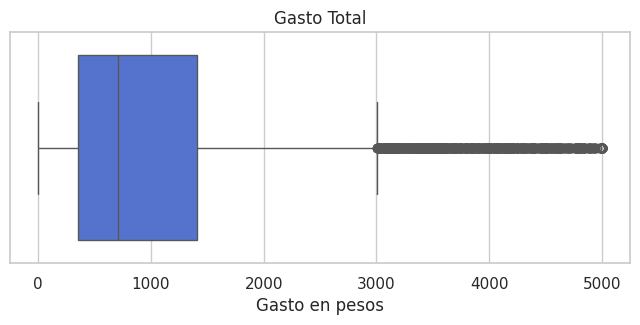

count    22217.000000
mean      1203.725859
std       1531.977294
min          0.000000
25%        355.000000
50%        750.000000
75%       1500.000000
max      76389.180000
Name: GastoTotal, dtype: float64

In [ ]:
# Encontramos outliers entre los 20 y 30mil y también uno entre 70 y 80mil. Filtremos el grafico con un tope de 5mil

df_filtrado = df[df['GastoTotal'] <= 5000]

sns.set(style="whitegrid")  # Estilo del gráfico
plt.figure(figsize=(8, 3))  # Tamaño de la figura
sns.boxplot(data=df_filtrado, x='GastoTotal', color='royalblue')
plt.xlabel('Gasto en pesos')
plt.title('Gasto Total')
plt.show()

df['GastoTotal'].describe() # Agregamos la funcion describe()

#Recomendaciones en base a los insights observados

En función de los puntos de salida más utilizados, podemos recomendar hacer énfasis en los paquetes que incluyan tickets de avión ya que el lugar más observado es el *Aeropuerto de Carrasco*, seguido por pasajes de medio marítimo relacionados a las salidas por el *puerto de Colonia del Sacramento*.
El punto Fray Bentos es un paso internacional terrestre, por lo que no tenemos estrategia comercial para recomendar allí.

Además, agregamos el siguiente análisis donde se muestran la cantidad de observaciones por cada tipo de "transporte de salida" que también verifica al medio aéreo como el más utilizado, seguido por el fluvial.

<Axes: xlabel='Medio de transporte', ylabel='Conteo de observaciones'>

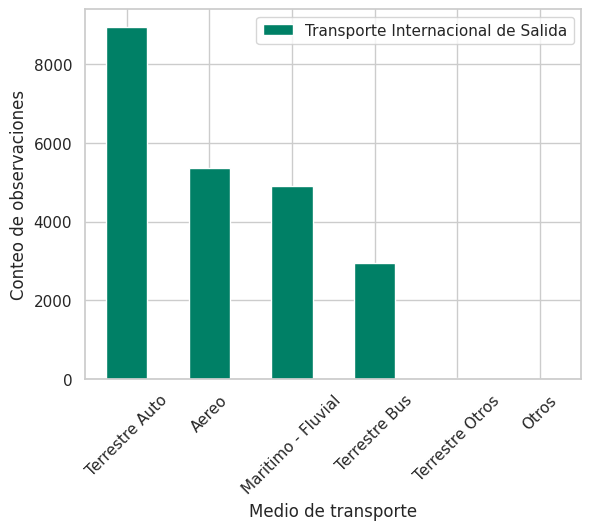

In [ ]:
# Contamos la cantidad de observaciones por cada medio de transporte utilizado

conteo_medio = df['Transporte Internacional de Salida'].value_counts().reset_index()

conteo_medio.plot.bar(y='Transporte Internacional de Salida', x='index', rot=45, xlabel='Medio de transporte', ylabel='Conteo de observaciones', colormap='summer')

En cuanto a los destinos más populares, Argentina se encuentra en primer lugar, seguido por Brasil. Claramente hay un volumen marcado por el turismo hacia estos dos países limítrofes. En segunda instancia podemos mencionar América del Norte y Central, y Europa, con valores muy por debajo.
Es claro que el contexto cambiario y la situación económica de Argentina es determinante para marcar esta tendencia. No haríamos foco en estas áreas de negocio ya que se dan naturalmente por factores externos.



<Axes: xlabel='Conteo de observaciones', ylabel='Destino del viaje'>

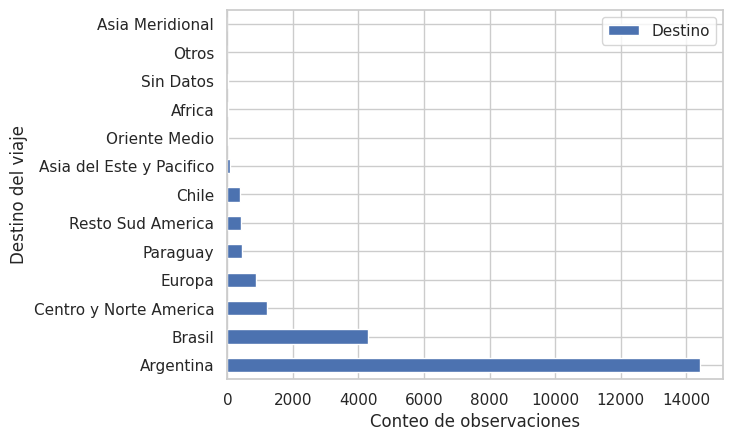

In [ ]:
# Contamos la cantidad de observaciones por cada destino de viaje

conteo_destino = df['Destino'].value_counts().reset_index()

conteo_destino.plot.barh(y='Destino', x='index', rot=0, ylabel='Destino del viaje', xlabel='Conteo de observaciones')

En cuanto a la estacionalidad, todo dependerá del o los destinos que se elijan resaltar, aquí podemos hacer dos observaciones: es claro que el intervalo entre diciembre y abril es el mas elegido, lo cual coincide con los tiempos de receso escolar.
La estrategia comercial podría dirigirse a aprovechar las propuestas en este período, o también, a mejorar o intensificar las propuestas entre mayo y noviembre donde el volumen de la actividad tiene sus valores más bajos, y de esta manera compensar con el intervalo de alta concurrencia.

En cuanto a los gastos, se debe analizar más en profundidad ya que la situación varía según el destino elegido (por tipo de cambio y costo de vida local) y el tiempo de la estadía. Creemos que merece un análisis por separado ya que los valores observados no guardan relación con la realidad económica actual.

### Análisis bi variado:
por último, haremos un gráfico entre todas las combinacions de dos campos normalizados como "IDs" y profundidad de punto por la columna "Gente"  para ver si existe alguna relación entre ellos.

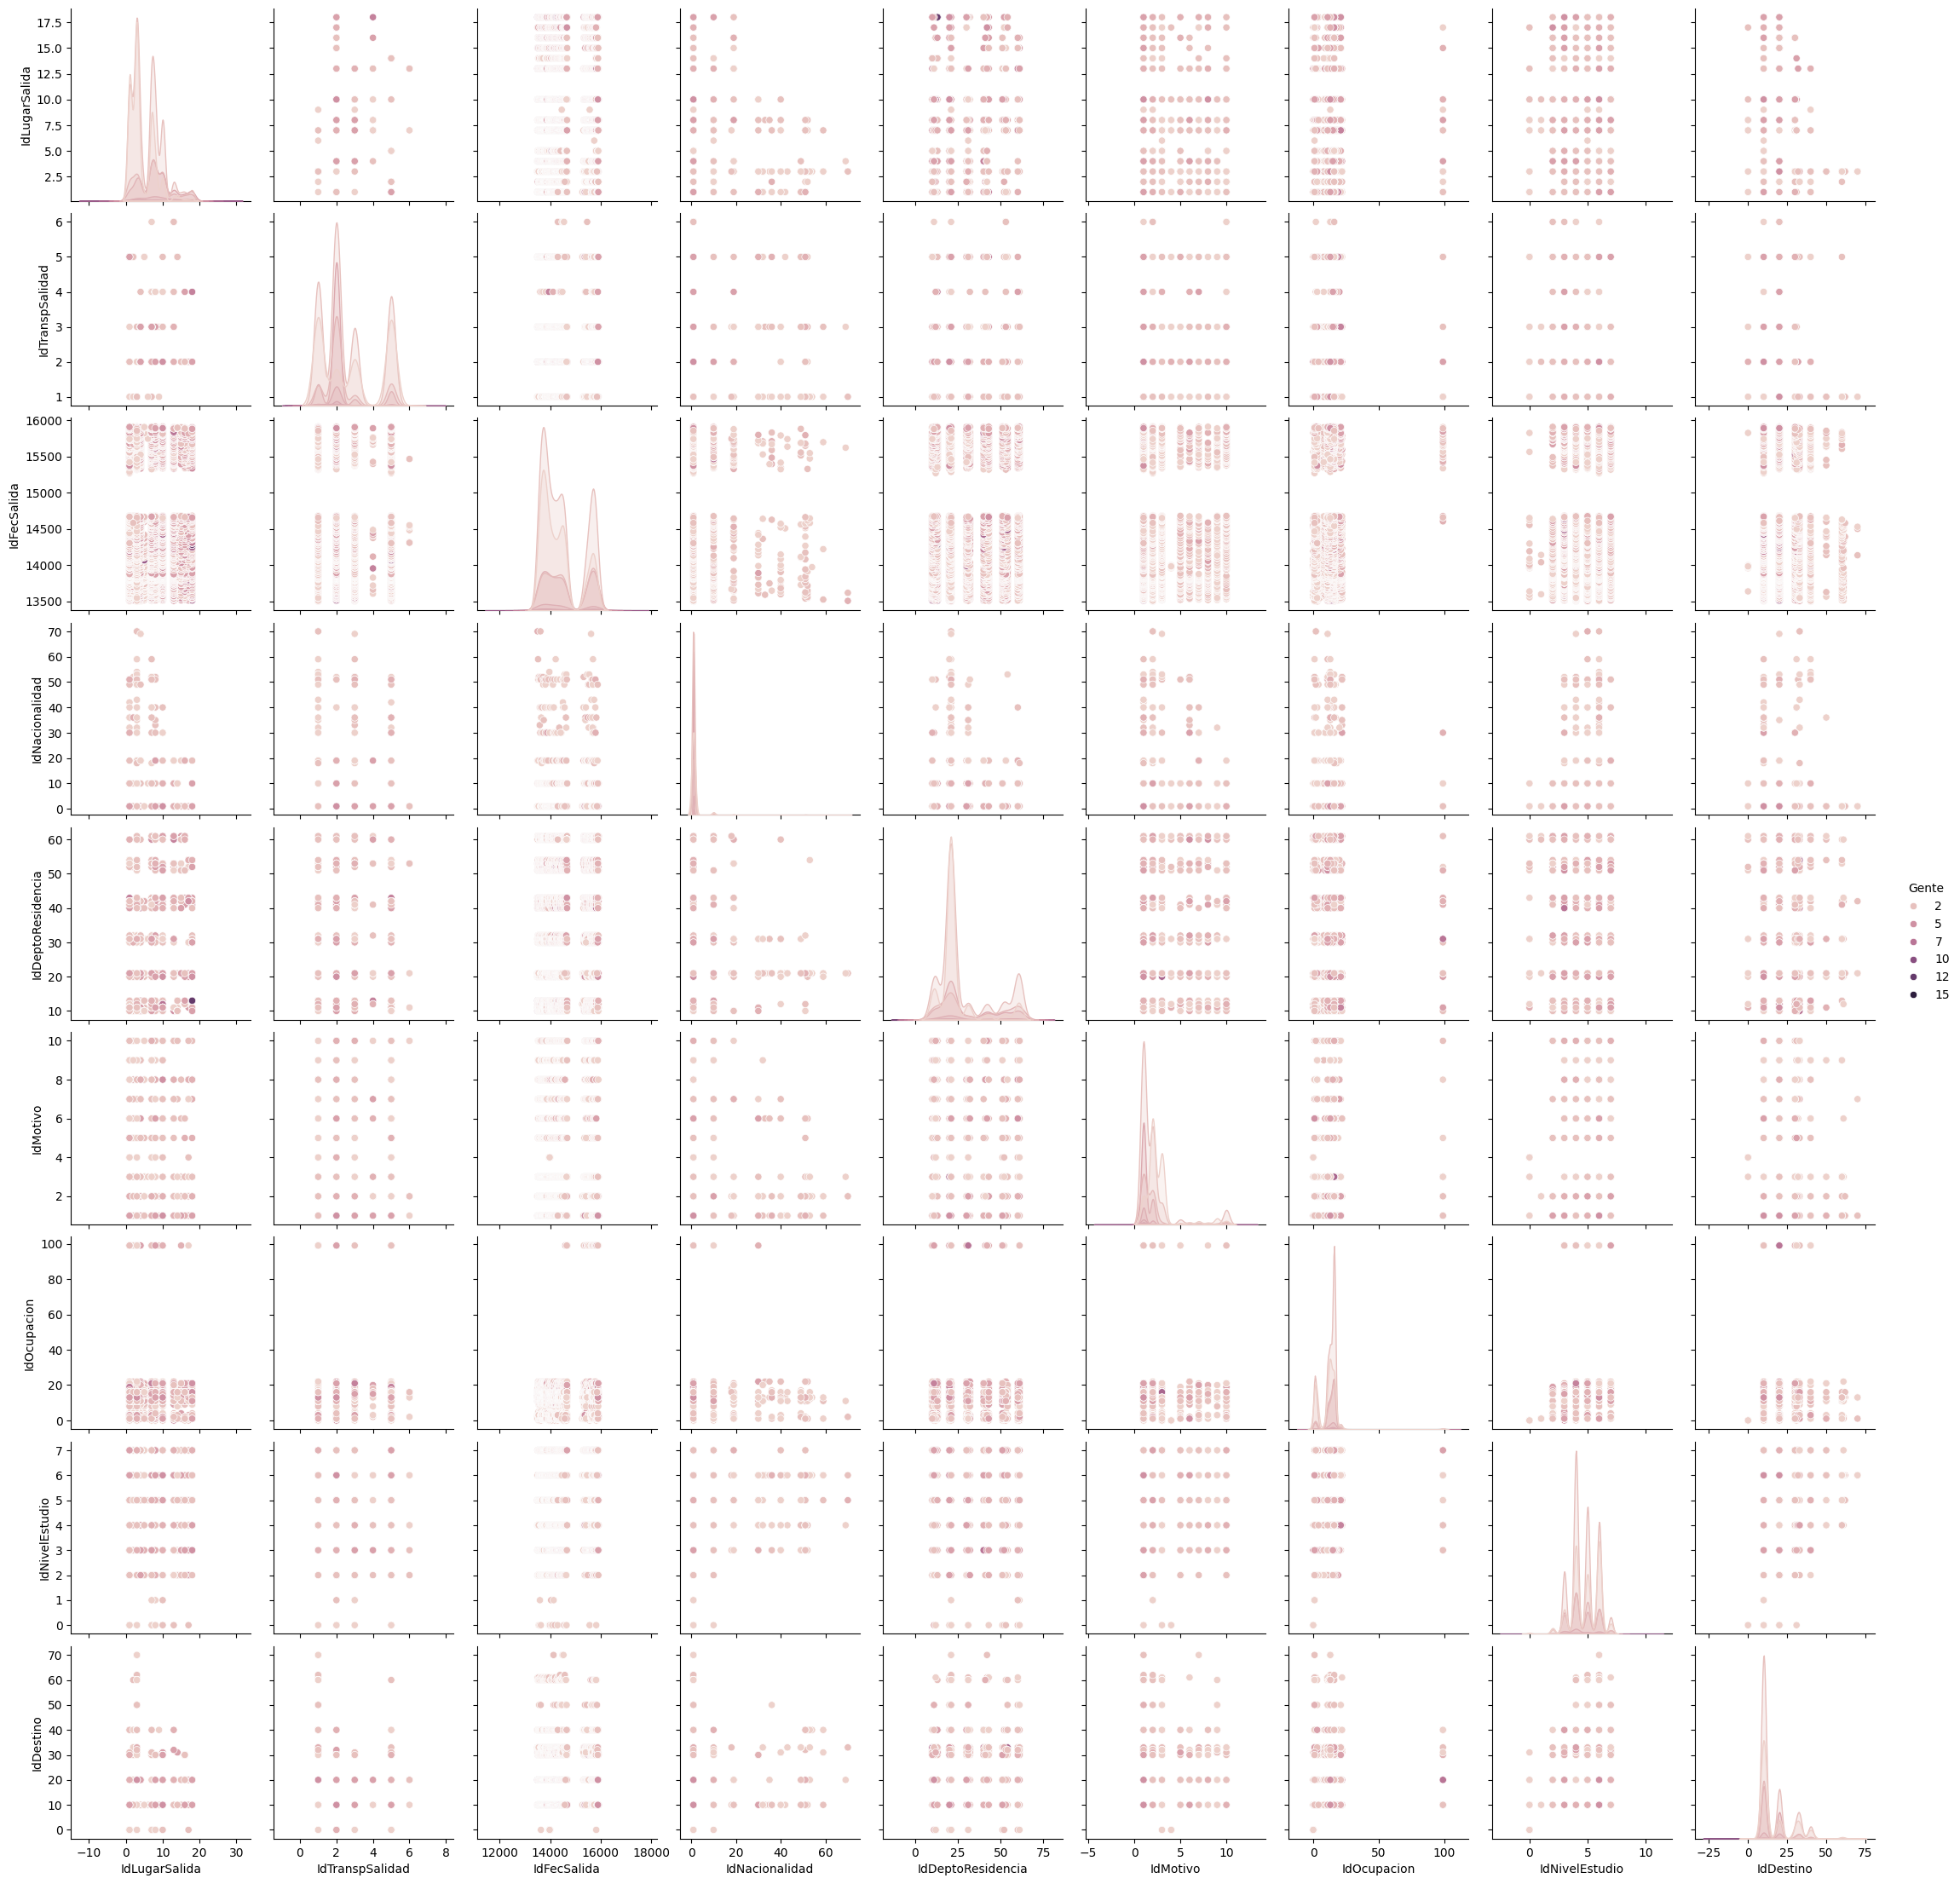

In [ ]:
mask= ['IdLugarSalida','IdTranspSalidad','IdFecSalida','IdNacionalidad','IdDeptoResidencia','IdMotivo','IdOcupacion','IdNivelEstudio', 'IdDestino', 'Gente']
df_id= df[mask]

#sns.pairplot(df_id, hue='Gente')

sns.pairplot(df_id, vars=df_id.columns[:-1], hue='Gente')
plt.show()

# Ingeniería de atributos

Vamos a intentar *predecir el volumen de pasajeros que podrían salir del país para cada observación* en función de todas las variables disponibles. Se trata de un modelo de regresión, en nuestro caso cada variable categórica está también expresada con una codificación numérica, por lo que en adelante utilizaremos estas ya codificadas para nuestros análisis.

En base a esta premisa, aplicamos la función *SelectKBest* de scikitlearn para seleccionar las mejores 5 features de todas las que correspondan a datos de "IDs" (de esta manera solo analizamos features numéricas).

In [22]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

columnas_seleccionadas = ['IdLugarSalida','IdTranspSalidad','IdFecSalida','IdNacionalidad','IdDeptoResidencia','IdMotivo','IdOcupacion','IdNivelEstudio', 'IdDestino']

X = df[columnas_seleccionadas]        # variables seleccionadas
y = df['Gente']                       # vector objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) # Particionamos en train y test relación 70/30

# Parametrizamos a 5 mejores características
k_best_features = 5

# Seleccionamos las mejores características usando el método f_classif
selector = SelectKBest(score_func=f_classif, k=k_best_features)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Guardamos el particionamiento para futuros análisis

#X_train.to_csv('/content/drive/MyDrive/Coder/Poyecto/ProyectoFinal/X_train.csv')
#X_test.to_csv('/content/drive/MyDrive/Coder/Poyecto/ProyectoFinal/X_test.csv')
#y_train.to_csv('/content/drive/MyDrive/Coder/Poyecto/ProyectoFinal/y_train.csv')
#y_test.to_csv('/content/drive/MyDrive/Coder/Poyecto/ProyectoFinal/y_test.csv')

In [38]:
# Shapes para validar las dimensiones del particionamiento
#X_train_selected.shape
#y_train.shape

# Obtenemos las características seleccionadas
features_selected_mask = selector.get_support()
all_feature_names = X_train.columns
selected_feature_names = all_feature_names[features_selected_mask]

# Imprimimos los nombres de las características seleccionadas
print("Características seleccionadas:", selected_feature_names)

Características seleccionadas: Index(['IdLugarSalida', 'IdTranspSalidad', 'IdDeptoResidencia', 'IdMotivo',
       'IdOcupacion'],
      dtype='object')


# Entrenamiento y Testeo

### Regresión lineal múltiple

Como queremos predecir un valor numérico, en este caso la cantidad de personas,  el algoritmo que utilizaremos es una regresión lineal múltiple aproximada por mínimos cuadrados.

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Creamos una instancia del modelo de regresión lineal
modelo_regresion = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_regresion.fit(X_train_selected, y_train)

# Predicciones con el conjunto de prueba
y_pred = modelo_regresion.predict(X_test_selected)

# Evaluamos el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.1366388188657637
R-squared: 0.17438027185471827


Validación cruzada: Kfolds de la regresión

In [25]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Creamos una instancia de KFold con el número deseado de pliegues (folds)
num_folds = 7
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Aplicamos validación cruzada y obtenemos los puntajes de rendimiento
# Aquí, estamos utilizando el MSE como métrica, pero puedes cambiarlo según tus preferencias
mse_scores = cross_val_score(modelo_regresion, X, y, scoring='neg_mean_squared_error', cv=kf)

# Pasamos los puntajes negativos a positivos y calculamos el promedio
mse_scores = -mse_scores
mse_mean = np.mean(mse_scores)

# Resultados
print(f'Mean Squared Error (MSE) Scores: {mse_scores}')
print(f'Mean Squared Error (MSE) Mean: {mse_mean}')


Mean Squared Error (MSE) Scores: [1.06354201 1.16268464 1.13005427 1.06475244 0.99654115 1.08483668
 1.02292483]
Mean Squared Error (MSE) Mean: 1.0750480016330426


### XGBoost

In [94]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Creamos un objeto DMatrix para los conjuntos de entrenamiento y prueba
dtrain = xgb.DMatrix(X_train_selected, label=y_train)
dtest = xgb.DMatrix(X_test_selected, label=y_test)

# Especificación de los parámetros del modelo
params = {
    'objective': 'reg:squarederror',  # Objetivo de regresión
    'eval_metric': 'rmse',  # Métrica de evaluación: error cuadrático medio (rmse)
    'max_depth': 3,  # Profundidad máxima del árbol
    'learning_rate': 0.1,  # Tasa de aprendizaje
    'n_estimators': 100  # Número de árboles (estimadores)
}

# Entrenamiento del modelo
modelo_xgboost = xgb.train(params, dtrain, num_boost_round=100)

# Predicciones en el conjunto de prueba
y_pred_xgboost = modelo_xgboost.predict(dtest)

# Evaluación del rendimiento del modelo
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2 = r2_score(y_test, y_pred_xgboost)
print(f"Mean Squared Error (XGBoost): {mse_xgboost}")
print(f"R-squared: {r2}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [17:19:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error (XGBoost): 0.8117187727542227
R-squared: 0.4103922711697304


Validación cruzada: Kfolds de XGBoost

In [27]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

# Creamos una función de métrica personalizada para usar con cross_val_score ya que espera una función de puntuación más alta mejor, por lo que negamos el MSE
custom_scorer = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Validación cruzada con XGBoost
num_folds = 7
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

cv_results = cross_val_score(xgb.XGBRegressor(**params), X_train_selected, y_train, cv=kf, scoring=custom_scorer)

# Convertimos los resultados a valores positivos y calculamos el promedio
mse_cv_mean = -np.mean(cv_results)

# Resultados
print(f'Mean Squared Error (MSE) Scores: {mse_scores}')
print(f'Mean Squared Error (CV): {mse_cv_mean}')


Mean Squared Error (MSE) Scores: [1.06354201 1.16268464 1.13005427 1.06475244 0.99654115 1.08483668
 1.02292483]
Mean Squared Error (CV): 0.7774977106658183


# Optimización

**Grid Search a la Regresión lineal**

Vamos a aplicar Grid Search ajustando el hyperparámetro 'fit_intercept' del algoritmo de regresión lineal

In [28]:
from sklearn.model_selection import GridSearchCV, train_test_split

# Especificamos las variantes del hyperparámetro a ajustar
param_grid = {
    'fit_intercept': [True, False],
}

# Creamos una función de métrica personalizada para usar con GridSearchCV, el cual espera una función de puntuación más alta mejor, por lo que negamos el MSE
custom_scorer = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Aplicamos regresión lineal
modelo_lineal = LinearRegression()

# Creamos el objeto GridSearchCV
grid_search_lineal = GridSearchCV(modelo_lineal, param_grid, cv=5, scoring=custom_scorer, n_jobs=-1)

# Ajustamos el modelo a los datos de entrenamiento
grid_search_lineal.fit(X_train_selected, y_train)

# Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros_lineal = grid_search_lineal.best_params_
mejor_modelo_lineal = grid_search_lineal.best_estimator_

# Predicciones en el conjunto de prueba con el mejor modelo
y_pred_gridsearch_lineal = mejor_modelo_lineal.predict(X_test_selected)

# Evaluación del rendimiento
mse_gridsearch_lineal = mean_squared_error(y_test, y_pred_gridsearch_lineal)
print(f"Mean Squared Error (GridSearchCV - Regresión Lineal): {mse_gridsearch_lineal}")
print("Mejores hiperparámetros:", mejores_parametros_lineal)


Mean Squared Error (GridSearchCV - Regresión Lineal): 1.1366388188657637
Mejores hiperparámetros: {'fit_intercept': True}


**Grid Search a XGBoost**

Volvemos a aplicar Grid Search, en este caso para  'max_depth', 'learning_rate' y 'n_estimators'

In [81]:
# Especificamos las variantes de los hyperparámetros a ajustar
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}

# Creamos una función de métrica personalizada para usar con GridSearchCV, el cual espera una función de puntuación más alta mejor, por lo que negamos el MSE
custom_scorer = make_scorer(lambda y_true, y_pred: -mean_squared_error(y_true, y_pred))

# Creamos el modelo de regresión de XGBoost
modelo_xgboost = xgb.XGBRegressor(objective='reg:squarederror')

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(modelo_xgboost, param_grid, cv=5, scoring=custom_scorer, n_jobs=-1)

# Ajustamos el modelo a los datos de entrenamiento
grid_search.fit(X_train_selected, y_train)

# Obtenemos los mejores hiperparámetros y el mejor modelo
mejores_parametros = grid_search.best_params_
mejor_modelo = grid_search.best_estimator_

# Predicciones en el conjunto de prueba con el mejor modelo
y_pred_gridsearch = mejor_modelo.predict(X_test_selected)

# Evaluación del rendimiento
mse_gridsearch_XGB = mean_squared_error(y_test, y_pred_gridsearch)
print(f"Mean Squared Error (GridSearchCV): {mse_gridsearch_XGB}")
print("Mejores hiperparámetros:", mejores_parametros)


Mean Squared Error (GridSearchCV): 0.7944062635356389
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


# Selección de modelos

Finalmente, luego del ajuste de hyperparámetros, los resultados que obtuvimos son:

In [41]:
print("Utilizando las siguientes variables predictoras: ", selected_feature_names)
print("")
print("los resultados son: ")
print("")
print(f"MSE (GridSearchCV - Regresión Lineal): {mse_gridsearch_lineal}")
print("Mejores hiperparámetros:", mejores_parametros_lineal)
print("")
print(f"MSE (GridSearchCV - XGBoost): {mse_gridsearch_XGB}")
print("Mejores hiperparámetros:", mejores_parametros)

Utilizando las siguientes variables predictoras:  Index(['IdLugarSalida', 'IdTranspSalidad', 'IdDeptoResidencia', 'IdMotivo',
       'IdOcupacion'],
      dtype='object')

los resultados son: 

MSE (GridSearchCV - Regresión Lineal): 1.1366388188657637
Mejores hiperparámetros: {'fit_intercept': True}

MSE (GridSearchCV - XGBoost): 0.7944062635356389
Mejores hiperparámetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


El MSE más bajo (0.79) corresponde a **XGBoost** con los siguientes parámetros:

*   **'learning_rate': 0.2**
*   **'max_depth': 3**
*   **'n_estimators': 200**


Por último, vamos a plotear las curvas de aprendizaje para cada modelo y analizarlas

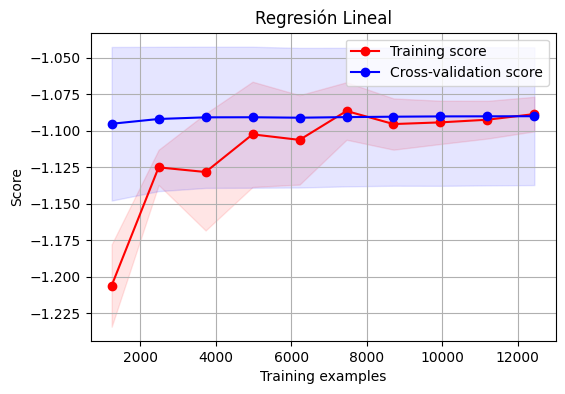

In [90]:
from sklearn.model_selection import learning_curve

# Definimos la función para la curva de aprendizaje
def plot_learning_curve(title, estimator, X, y, ylim=None, cv=None, scoring=None):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y, cv=cv, scoring=scoring, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True)

    # Calculamos las medias y desviaciones estándar de las puntuaciones
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Ploteamos la curva de aprendizaje
    plt.figure(figsize=(6, 4))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b", label="Cross-validation score")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Llamamos a la función con cada modelo
g = plot_learning_curve("Regresión Lineal", modelo_lineal, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

Para el caso de la **regresión lineal**, vemos que a medida que crece el conjunto de entrenamiento las curvas convergen, lo que nos indica que luego de las 8000 observaciones el modelo ha alcanzado su límite de capacidad y no mejorará. A su vez, es espacio entre las curvas se va minimizando, lo que nos da un indicio de que el modelo generaliza bien, para datos no vistos tendría un buen rendimiento.

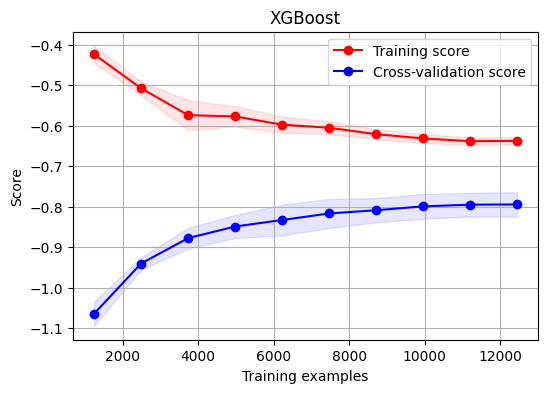

In [91]:
g = plot_learning_curve("XGBoost", modelo_xgboost, X_train_selected, y_train, cv=5, scoring='neg_mean_squared_error')

Para el caso de XGBoost también es claro que cuanto mayor el conjunto de entrenamiento, mayor rendimiento y después de las 8000 observaciones las curvas se estabilizan. En este caso, las curvas están más separadas, podría deberse a un caso de overfitting donde el modelo se ajusta demasiado a los datos de entrenamiento y tiene dificultades para generalizar.